In [1]:
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftshift
from scipy.signal import butter, lfilter, freqz
import numpy as np

In [2]:
#LPF

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

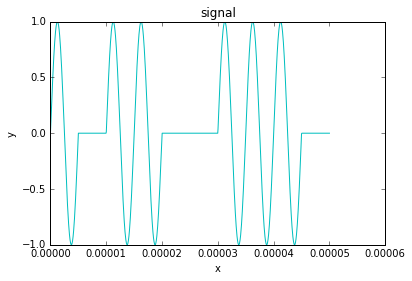

In [3]:
#L=[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]+[1,0,1,1,0,0,1,1,1,0]
#L=[0,0,0,0,1,0,0,0,0,1]
#L=[1,1,1,1,1,1,1,1,1,1]
L= [1,0,1,1,0,0,1,1,1,0]
#L=[1,0,1,0,1,0,0,0,1,1]

nbL = len(L)

NbPtsBit = 100
F = 200000
LBit = 1/F



#OOK modulation
y1=np.linspace(0, nbL*LBit, nbL*NbPtsBit)
x  = np.linspace(0, (nbL)*LBit, nbL*NbPtsBit) # generates x axis in range 0 to 6 with 20000 points

M1=[]
for k in range (len(L)):
    if L[k] == 0:
        M1.append(0)
    else : 
        M1.append(1)
    
for j in range (len(M1)):
    i=0
    for i in range (NbPtsBit):
        y1[i+j*NbPtsBit]=M1[j]


'''for j in range (len(L)):
    i=0
    for i in range (10):
        y1[i+j*10]=L[j]
    #y=y*window'''

    
F=200000
    
yook=np.sin(2 * np.pi * x*F)*y1

plt.plot(x, yook, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signal')
plt.show()


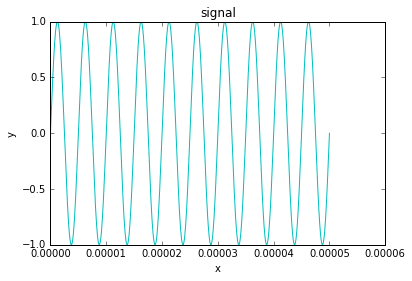

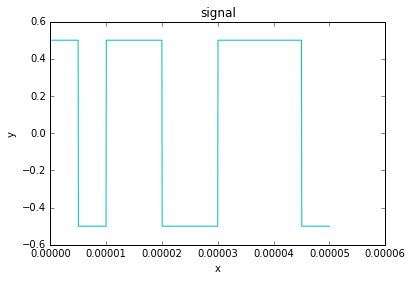

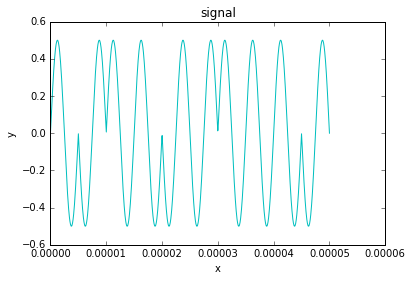

1000
1000


In [4]:
#PSK modulation

# regarder le nb de bit de la fonction sinus de numpy, vérifier s'il n'y a pas de déphasage (début du signal comparé au début du signal suivant)
# 1 bit = 2 sinus à une fréquence de 200kHz => trouver le nb de points nécessaire pour composer notre mot de bit


#L=[1,1,1,1,1,1,1,1,1,1]
L=[1,0,1,1,0,0,1,1,1,0]
#L=[1,0,1,0,1,0,0,0,1,1]
#L=[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]+[1,0,1,1,0,0,1,1,1,0]
nbL = len(L)

NbPtsBit = 100
F = 200000
LBit = 1/F

x  = np.linspace(0, (nbL)*LBit, nbL*NbPtsBit) # generates x axis in range 0 to 6 with 20000 points

y=np.linspace(0, (nbL)*LBit, nbL*NbPtsBit)

#window = 0.5*signal.gaussian(10, std=1)
#print(window)
#for k in range(1000):
M=[]
for k in range (len(L)):
    if L[k] == 0:
        M.append(-1)
    else : 
        M.append(1)
    
for j in range (len(M)):
    i=0
    for i in range (NbPtsBit):
        y[i+j*NbPtsBit]=M[j]
    #y=y*window


sig = np.sin(2*np.pi * x*F)


#plt.plot(window)
#plt.title(r"Gaussian window ($\sigma$=7)")
#plt.ylabel("Amplitude")
#plt.xlabel("Sample")

plt.plot(x, sig, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signal')
plt.show()

somme= y*0.5

plt.plot(x, somme, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signal')
plt.show()

sigA = somme*sig


plt.plot(x, sigA, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signal')
plt.show()

LL = len(sig)
print(LL)

LLL = len(sigA)
print(LLL)

In [1]:
from redpitaya.overlay.mercury import mercury as overlay

fpga = overlay()



AttributeError: /media/miunn/OS/Users/Remi/Documents/INSA/PLP24/venv/bin/python3: undefined symbol: iio_get_backends_count

In [6]:
gen0 = fpga.gen(0)

In [7]:
osc0 = fpga.osc(0, 1.0)

In [8]:
osc1 = fpga.osc(1, 1.0)

In [9]:
gen0.amplitude = 1.0
gen0.offset    = 0.0
gen0.waveform  = yook

gen0.mode = 'PERIODIC'
gen0.frequency = 2

gen0.start()
gen0.enable = True
gen0.trigger()

In [10]:
gen0.frequency 

1.9073486328125

In [25]:
gen0.enable = False

In [11]:
from time import time, sleep, strftime, gmtime
from math import sqrt
from scipy.io import savemat,loadmat
from os import makedirs,chdir

Total_duration = 1 # Total duration of the experiment (s)
Delta_t = 2 # time between two experiments (s)
nb_acquisition = 1 # impulse is averaged over n acquisitions
buffer_size= 16384 
fech=125e6
n=0
osc0.decimation = 10000
osc1.decimation = 10000

In [16]:
t0 = time() #Started time
print(t0)
elapsed_time = 0
Acq = 0
try :
    foldername = '/home/jupyter/RedPitaya/'
    #foldername = '/root/PLP22INT01/signal/'
    #foldername = '/home/plp22int01/Téléchargements'
    while Acq<nb_acquisition:
        t1 = time()
        print(t1)
        sign = np.zeros ((buffer_size, nb_acquisition))   
        sign1 = np.zeros ((buffer_size, nb_acquisition))   

        print(len(sign[0]))
        #recording nb_acquisition  
        print('error1')

        for i in range (0, nb_acquisition):
            print('errorfor')
            #t, response_sig = Acq( gen0, osc0, fpga)
            #print(response_sig)
            
            f_ech = 125*10**6 ;  #Sampling frequency of the redpitaya
            t = np.arange(0, Total_duration, Total_duration/(buffer_size)) # time vector
            Amp = 0.9;           # Amplitude du sinus
            print('errorfonction1')

            # trigger timing
            N = osc0.buffer_size
            print(N)
            osc0.trigger_pre  = 0
            osc0.trigger_post = N    ## 7143 = 1/1.4e-4 = 16384*1/f_ech
            print('errorfonction5')


            # trigger timing
            N1 = osc1.buffer_size
            print(N1)
            osc1.trigger_pre  = 0
            osc1.trigger_post = N1    ## 7143 = 1/1.4e-4 = 16384*1/f_ech
            print('errorfonction5.1')
            
            
            # synchronization between generator and record system
            osc0.sync_src = fpga.sync_src['gen0']
            osc0.trig_src = 0
            
            osc1.sync_src = fpga.sync_src['gen0']
            osc1.trig_src = 0
            
            gen0.start()
            gen0.enable = True
            gen0.trigger()
            while (osc0.status_run()): pass
            while (osc1.status_run()): pass
            print('errorfonction6')
            
            # Data acquisition
            response_sig = osc0.data(N)
            send_sig = osc1.data(N)

            print(len(response_sig))
            print(len(send_sig))
            print('errorfonction7')
            print(len(sign))
            sign[:, i] = response_sig  
            sign1[:, i] = send_sig  
            print('naruto')
            
        print('eer')
            
        # Average
        mean_impulse_response = np.mean(sign, axis = 1)
        mean_impulse_response1 = np.mean(sign1, axis = 1)

        print('error3')
   
        # Save time and data
        elapsed_time = time() - t0
        print('error4')

        dt = int(elapsed_time)
        print('error5')

        filename = foldername + 't_' + strftime ('%Y_%m_%d_%H_%M_%S', gmtime()) + 's'
        filename1 = foldername + 'SEND_t_' + strftime ('%Y_%m_%d_%H_%M_%S', gmtime()) + 's'

        print('error6')
        
        print(filename + '.mat', {'texp_s': dt, 'time_s': t, 'impulse_response': mean_impulse_response})
        savemat(filename + '.mat', {'texp_s': dt, 'time_s': t, 'impulse_response': mean_impulse_response})
        savemat(filename1 + '.mat', {'texp_s': dt, 'time_s': t, 'impulse_response': mean_impulse_response1})

        print(Acq)
        print('error7')


        elapsed_time2 = time() - t1
        print(elapsed_time2)
        #sleep(Delta_t - elapsed_time2) # sleep until next recording session
        #sleep(0.1)
        Acq+=1
except :
    print('error')


1617332894.3460689
1617332894.3545763
1
error1
errorfor
errorfonction1
16384
errorfonction5
16384
errorfonction5.1
errorfonction6
16384
16384
errorfonction7
16384
naruto
eer
error3
error4
error5
error6
/home/jupyter/RedPitaya/t_2021_04_02_03_08_15s.mat {'time_s': array([  0.00000000e+00,   6.10351562e-05,   1.22070312e-04, ...,
         9.99816895e-01,   9.99877930e-01,   9.99938965e-01]), 'impulse_response': array([ 0.00866726,  0.00305185, -0.00903348, ...,  0.00170904,
       -0.02356029,  0.01867733]), 'texp_s': 1}
0
error7
1.3645856380462646


In [19]:
savemat(filename + '.mat', {'texp_s': dt, 'time_s': t, 'impulse_response': mean_impulse_response})


In [38]:
len(osc0.data(N))

16384

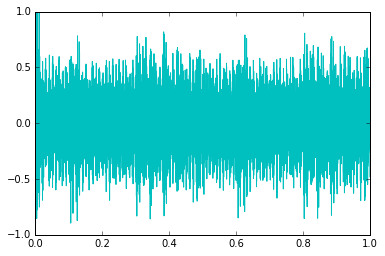

In [79]:
#BPSK coherent demodulation


sigB = loadmat('t_2021_04_02_04_18_48s.mat')
A = sigB['impulse_response'].tolist()
B = A[0]
C = sigB['time_s'].tolist()
D= C[0]


plt.plot(D, B, 'c')
plt.show()




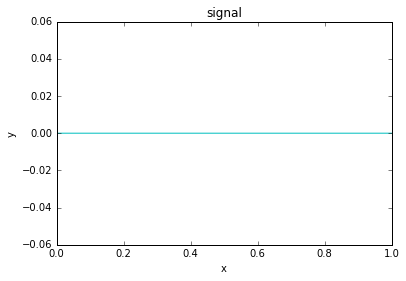

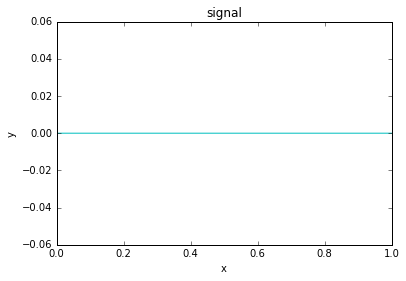

In [83]:
order = 6
fs = 1000       
cutoff = 3.6

b, a = butter_lowpass(cutoff, fs, order)

sigC = butter_lowpass_filter(B, cutoff, fs, order)

plt.plot(D, B, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signal')
plt.show()

#decision making device
Threshold = 0.

for j in range (len(B)):
    if B[j]<=Threshold:
        B[j]=0
    elif B[j]>Threshold:
        B[j]=1

plt.plot(D, B, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signal')
plt.show()

In [82]:
#### -*- coding: utf-8 -*-
from scipy.signal import chirp , tukey, butter, filtfilt
import numpy as np
from math import sqrt, log, ceil

def Acq( gen0, osc0, fpga):
    '''
    Function simple_record:
        Records the signal on channels "channels", with sampling frequency "fs", for duration "duration", with a pretrig percentage of duration

    Parameters
    ----------
    channels : list of int
        Channels on which to measure signal.
    fs : int
        Sampling frequency (Hz)
    duration : float
        Duration (s) of the recorded signal, after pretrig.
    pretrig : float, optional
        Percentage of duration to record before trigger (%). The default is 0.1%.

    Returns
    -------
    t_s : numpy array of float
    time in seconds (max time: (1 + pretrig) * duration), length: (1 + pretrig) * duration) * fs 
    sig : numpy array of float
        signal in mV on each channels (len), same length as time.

    '''
    print('errorfonction1')

    f_ech = 125*10**6 ;  #Sampling frequency of the redpitaya
    t = np.arange(0, 2**14 * 1/f_ech, 1/f_ech) # time vector
    Amp = 0.9;           # Amplitude du sinus
    print('errorfonction1')

    #Generator setting     
    gen0.amplitude = 1.0
    gen0.offset    = 0.0
    gen0.waveform  = yook
    print('errorfonction2')

    gen0.mode = 'PERIODIC'
    gen0.frequency = 20000
    print('errorfonction3')
    
    # data rate decimation
    osc0.decimation = 10
    print('errorfonction4')
    
    # trigger timing
    N = osc0.buffer_size
    osc0.trigger_pre  = 0
    osc0.trigger_post = N
    print('errorfonction5')


    # synchronization between generator and record system
    osc0.sync_src = fpga.sync_src['gen0']
    osc0.trig_src = 0
    gen0.start()
    gen0.enable = True
    gen0.trigger()
    while (osc0.status_run()): pass
    
    # Data acquisition
    response_sig = osc0.data(N)
    '''
    # Filtering and windowing
    L = len(response_sig) # length of the measured signal
    b, a = butter(2, [2*fdepart/f_ech, 2*ffin/f_ech], 'bandpass')
    filtered_response = filtfilt(b, a, response_sig) * tukey(L, 0.05)
    filtered_chirp = filtfilt(b, a, chirp_sig) * tukey(L, 0.05)
    
    # fft
    nb = 2**(ceil(log(L) / log(2)) + 1) # fft length
    ftresponse = np.fft.rfft(filtered_response, nb)
    ftchirp = np.fft.rfft(filtered_chirp, nb)
    
    # Amax and Fmean
    Amax = np.max(ftresponse) # maximum amplitude of the spectrum
    freq = np.linspace(0, f_ech/2, len(ftresponse)) # frequencies
    Fmean = np.sum(np.abs(ftresponse) * freq) / np.sum(np.abs(ftresponse)) # Average frequency of the spectrum
    
    # Impulse response
    corre = np.fft.irfft(ftresponse * np.conjugate(ftchirp)) # chirp deconvolution
    impulse_response = corre[:len(t)] / np.max(corre[:len(t)]) # normalization
    '''
    return (t, response_sig)


def decorrel_coef(sig1, sig2):
    '''
    Compute the decorrelation coefficient between two signals sig1 and sig2 (numpy arrays)
    '''
    return 1 - sum(sig1 * sig2) / sqrt(sum(sig1**2) * sum(sig2**2))
